In [7]:
import pandas as pd
import numpy as np
import nltk
import wordcloud

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
imdb=pd.read_csv('C:/Users/Administrator/Desktop/Term 3/Unstructured Data/datasets/imdb_sentiment.csv')
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
imdb['sentiment'].value_counts()

1    386
0    362
Name: sentiment, dtype: int64

## Bag of Words Analysis

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

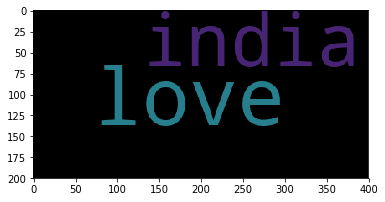

In [6]:
wc=WordCloud().generate('i love india')
plt.imshow(wc)
plt.show()

#### Plot for imdb dataset

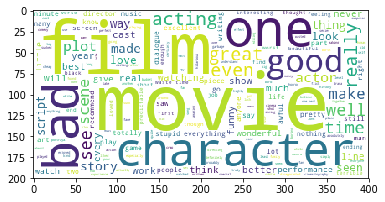

In [7]:
input_string=' '.join(imdb['review'])
wc=WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)
plt.show()

## Text cleaning

- convert every character to lowercase
- remove junk characters
- remove commonly used words
- Identify root of the words

In [32]:
docs=imdb['review'].str.lower().str.replace('[^a-z ]','')

In [66]:
for doc in docs.head(2):
    words=doc.split(' ')
    print(doc)
    print(words)
    print('------')

a very very very slowmoving aimless movie about a distressed drifting young man  
['a', 'very', 'very', 'very', 'slowmoving', 'aimless', 'movie', 'about', 'a', 'distressed', 'drifting', 'young', 'man', '', '']
------
not sure who was more lost  the flat characters or the audience nearly half of whom walked out  
['not', 'sure', 'who', 'was', 'more', 'lost', '', 'the', 'flat', 'characters', 'or', 'the', 'audience', 'nearly', 'half', 'of', 'whom', 'walked', 'out', '', '']
------


#### have to remove all common words used in english and stemmed

In [21]:
stopwords=nltk.corpus.stopwords.words('english')
len(stopwords)

179

In [22]:
stemmer=nltk.stem.PorterStemmer()

In [59]:
docs_clean=[]
docs=imdb['review'].str.lower().str.replace('[^a-z ]','')
for doc in docs.head(2):
    words=doc.split(' ')
    words_clean=[stemmer.stem(word) for word in words if word not in stopwords]
    docs_clean.append(' '.join(words))
print(docs_clean)

['a very very very slowmoving aimless movie about a distressed drifting young man  ', 'not sure who was more lost  the flat characters or the audience nearly half of whom walked out  ']


#### using this in a function

In [39]:
docs=imdb['review'].str.lower().str.replace('[^a-z ]','')
def clean_sentence(text):
    words=text.split(' ')
    words_clean=[]
    words_clean=[stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)

In [60]:
docs_clean=docs.apply(clean_sentence)
docs_clean.head()

0      slowmov aimless movi distress drift young man  
1    sure lost  flat charact audienc nearli half wa...
2    attempt arti black  white clever camera angl m...
3                            littl music anyth speak  
4    best scene movi gerardo tri find song keep run...
Name: review, dtype: object

### Document Term Matrix Properties

1. Matrix which contains values of how many times a word is repeated
2. row sum will gives the no: of terms in a document
3. column sum will give the frequency of each term across all documents
4. Its a sparse metric(m x n) where m=no: of rows, n=no: of columns(more number of zeros than non-zeros)
5. High dimension data
6. Every columns is a vector representation of a term

## Document Term Matrix

### Count Vectorizer

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
vectorizer.fit(docs_clean)
dtm=vectorizer.transform(docs_clean)

In [72]:
dtm

<748x2475 sparse matrix of type '<class 'numpy.int64'>'
	with 6797 stored elements in Compressed Sparse Row format>

- No: of zeros = (748*2475) - 6797(no: of non-zero)
- sparsity = ((no: of zeros)/(748 * 2475))*100

- z=748*2475-6797
- s=(z/(748*2475))*100
- Sparsity is 99.63

In [67]:
print(dtm.shape)
print(docs_clean.shape)

(109, 34)
(748,)


In [78]:
df_dtm=pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())
df_dtm.head()

,aailiyah,abandon,abil,abroad,absolut,abstrus,abysm,academi,accent,access,...,younger,your,youth,youtub,youv,yun,zillion,zombi,zombiestud,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### to find out the number of zeros in dtm

In [82]:
(df_dtm==0).sum().sum()

1844503

#### to find the term-wise frequency across documents( default sum is column-wise )

In [84]:
df_dtm.sum().sort_values(ascending=False).head(10)

movi       207
film       184
one         79
bad         67
like        59
charact     58
good        56
time        49
watch       48
act         46
dtype: int64

#### to find the row-wise sum

In [85]:
df_dtm.sum(axis=1).sort_values(ascending=False).head(10)

136    686
19     425
646    408
149    131
135    107
422     41
192     37
223     34
271     31
230     29
dtype: int64

## Spliting the data

In [86]:
from sklearn.model_selection import train_test_split

In [94]:
train_x,test_x=train_test_split(df_dtm,test_size=0.2,random_state=100)
train_y=imdb.iloc[train_x.index]['sentiment']
test_y=imdb.iloc[test_x.index]['sentiment']

## Applying the model

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [93]:
model_rf=RandomForestClassifier(n_estimators=1000)
model_rf.fit(train_x,train_y)
pred=model_rf.predict(test_x)
print('accuracy is ',accuracy_score(pred,test_y))

accuracy is  0.7266666666666667


In [96]:
model_gn=GaussianNB()
model_gn.fit(train_x,train_y)
pred=model_gn.predict(test_x)
print('accuracy is ',accuracy_score(pred,test_y))

accuracy is  0.5933333333333334


In [97]:
model_mn=MultinomialNB()
model_mn.fit(train_x,train_y)
pred=model_mn.predict(test_x)
print('accuracy is ',accuracy_score(pred,test_y))

accuracy is  0.7733333333333333


## Using the HOTSTAR dataset

In [98]:
hotstar=pd.read_csv('C:/Users/Administrator/Desktop/Term 3/Unstructured Data/datasets/hotstar.allreviews_Sentiments.csv')
hotstar.head()

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral


In [128]:
hotstar['Sentiment_Manual'].value_counts()

Neutral     1738
Positive    1733
Negative    1582
Name: Sentiment_Manual, dtype: int64

In [129]:
docs=hotstar['Lower_Case_Reviews'].str.replace('[^a-z ]','')

In [130]:
docs_clean=docs.apply(clean_sentence)

In [131]:
vectorizer.fit(docs_clean)
train=vectorizer.transform(docs_clean)
train=pd.DataFrame(train.toarray(),columns=vectorizer.get_feature_names())

In [132]:
train_x,test_x=train_test_split(train,test_size=0.2,random_state=100)
train_y=hotstar.iloc[train_x.index]['Sentiment_Manual']
test_y=hotstar.iloc[test_x.index]['Sentiment_Manual']

In [133]:
model_mn=MultinomialNB()
model_mn.fit(train_x,train_y)
pred=model_mn.predict(test_x)
print('accuracy is ',accuracy_score(pred,test_y))

accuracy is  0.7359050445103857


In [134]:
model_rf=RandomForestClassifier(n_estimators=300)
model_rf.fit(train_x,train_y)
pred=model_rf.predict(test_x)
print('accuracy is ',accuracy_score(pred,test_y))

accuracy is  0.7329376854599406


### TF-IDF Vectorizer

- Reduced the weightage of those terms/words which occurs across all the documents
- IDF(term frequency-inverse document frequency)
- its defined as,
    IF = log(no: of documents / no: of document that the term has)
- gives weightage to those rare terms present in the documents
- check with the words in how many documents its used, if it is then the weightage is given less

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [139]:
vectorizer=TfidfVectorizer()
vectorizer.fit(docs_clean)
train=vectorizer.transform(docs_clean)
train=pd.DataFrame(train.toarray(),columns=vectorizer.get_feature_names())

In [140]:
train_x,test_x=train_test_split(train,test_size=0.2,random_state=100)
train_y=hotstar.iloc[train_x.index]['Sentiment_Manual']
test_y=hotstar.iloc[test_x.index]['Sentiment_Manual']

In [141]:
model_mn=MultinomialNB()
model_mn.fit(train_x,train_y)
pred=model_mn.predict(test_x)
print('accuracy is ',accuracy_score(pred,test_y))

accuracy is  0.7339268051434223


In [143]:
model_rf=RandomForestClassifier(n_estimators=300)
model_rf.fit(train_x,train_y)
pred=model_rf.predict(test_x)
print('accuracy is ',accuracy_score(pred,test_y))

accuracy is  0.7497527200791295


## Exercise

1. Exercise : Tweets Clustering
    - Using Narendra Modi's tweets data, identify minimum and maximum date date from created_at column
    - create wordcloud using all the rows from the test column
    - clean the text column
        - convert all characters to lower case
        - apply regualr expressions to retain only alphabets, #, 0 and spaces
        - remove stopwords
        - apply stemming
    - create document term matrix using countvectorizer : set min_df=5
    - using kmean algorithm, cluster the tweets into 4 groups
    - create worldcloud for each group

In [8]:
tweets=pd.read_csv('C:/Users/Administrator/Desktop/Term 3/Unstructured Data/datasets/narendramodi_tweets.csv')
tweets.head(5)

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [146]:
tweets['created_at']=pd.to_datetime(tweets['created_at'])

In [9]:
tweets.created_at.min()

'2016-03-09 12:22:10'

In [10]:
tweets.created_at.max()

'2017-01-31 11:00:07'

In [11]:
text=' '.join(tweets['text'])

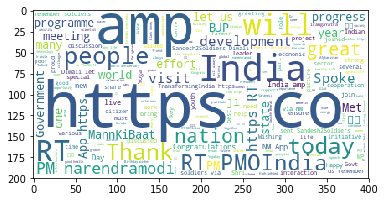

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud(background_color='white').generate(text)
plt.imshow(wc)
plt.show()

In [157]:
# import re
# text=re.sub('[^a-z #@]','',text)

In [13]:
docs=tweets['text'].str.lower().str.replace('[^a-z@# ]','')

In [16]:
import nltk
from nltk.stem import PorterStemmer

In [17]:
stopwords=nltk.corpus.stopwords.words('english')
stemmer=PorterStemmer()
def clean_sentence(text):
    words=text.split(' ')
    words=[stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words)

In [18]:
docs_clean=[]
docs_clean=docs.apply(clean_sentence)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vectorizer=CountVectorizer(max_df=5)
vectorizer.fit(docs_clean)
dtm=vectorizer.transform(docs_clean)
df_dtm=pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())

In [30]:
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=4)
km_model.fit(df_dtm)
labels = km_model.predict(df_dtm)
len(labels)

3220

In [31]:
modi_txt_clean_wc = docs_clean
tweets_df = pd.DataFrame({'text':modi_txt_clean_wc,'cluster':labels})
tweets_df.head()

,text,cluster
0,presid address wonder encapsul india strength ...,0
1,rashtrapati ji address hous parliament indepth...,0
2,rt @pmoindia empow marginalis httpstcowwsqgwdk,0
3,rt @pmoindia commit welfar farmer httpstcopaaf...,0
4,rt @pmoindia improv qualiti life poor httpstco...,0


### Create wordcloud for each Cluster

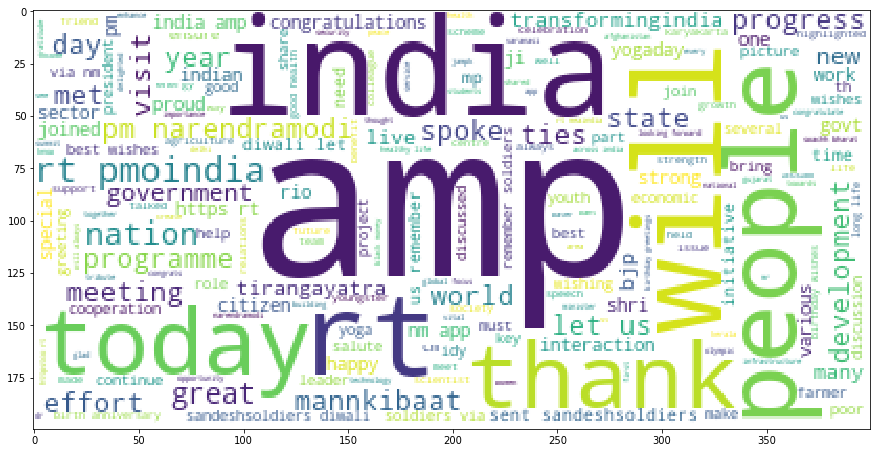

In [25]:
input_string0 = ' '.join(tweets_df[tweets_df['cluster']==0]['text'])
plt.figure(figsize=(15,10))
wc_cluster0 = WordCloud(background_color='white').generate(input_string0)
plt.imshow(wc_cluster0)

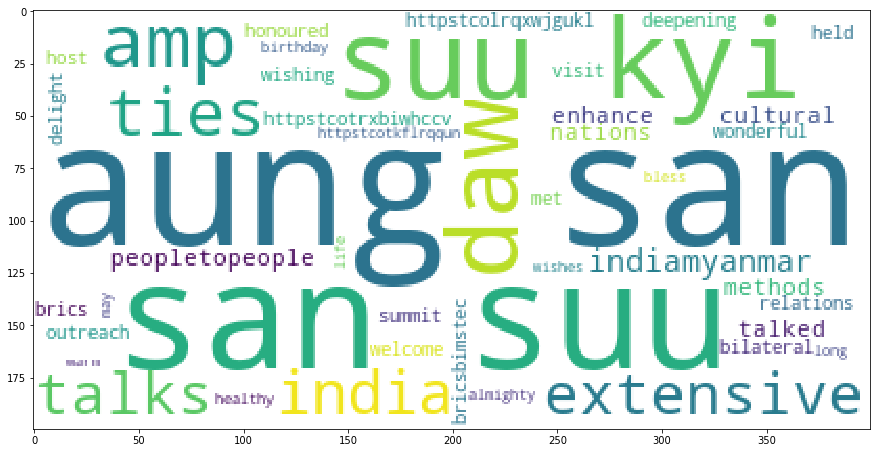

In [26]:
input_string1 = ' '.join(tweets_df[tweets_df['cluster']==1]['text'])
plt.figure(figsize=(15,10))
wc_cluster1 = WordCloud(background_color='white').generate(input_string1)
plt.imshow(wc_cluster1)

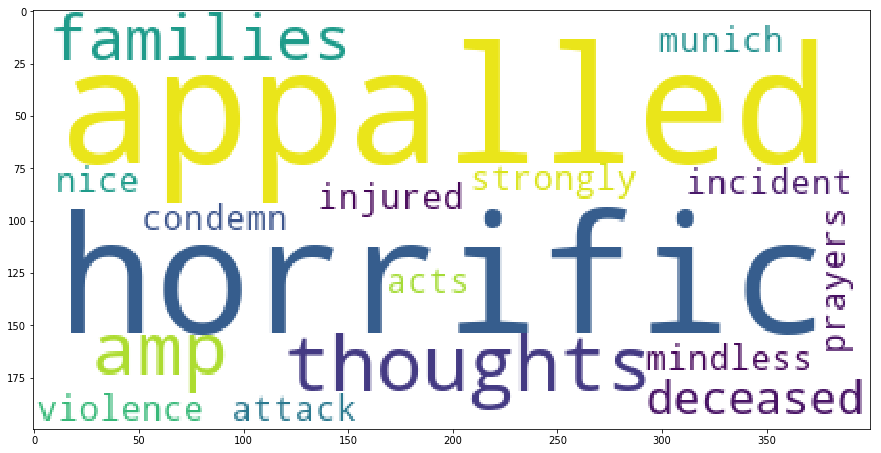

In [27]:
input_string2 = ' '.join(tweets_df[tweets_df['cluster']==2]['text'])
plt.figure(figsize=(15,10))
wc_cluster2 = WordCloud(background_color='white').generate(input_string2)
plt.imshow(wc_cluster2)

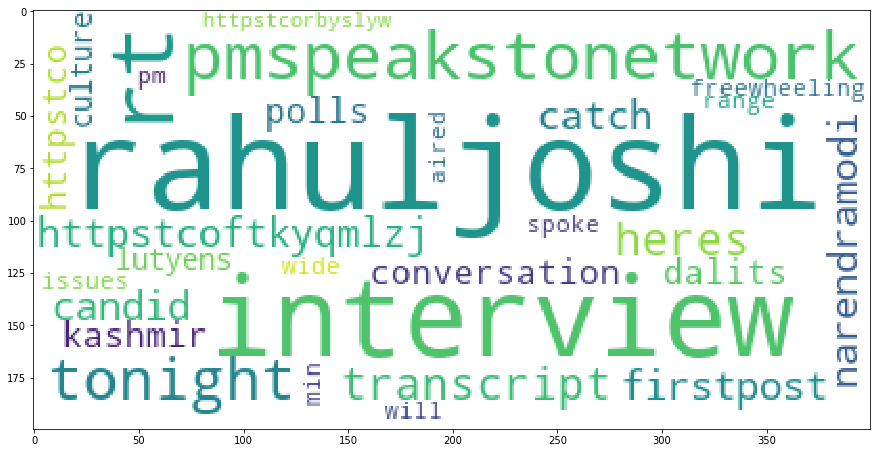

In [28]:
input_string3 = ' '.join(tweets_df[tweets_df['cluster']==3]['text'])
plt.figure(figsize=(15,10))
wc_cluster3 = WordCloud(background_color='white').generate(input_string3)
plt.imshow(wc_cluster3)

In [180]:
# df_dtm=np.array(list(zip(df_dtm)))
# K=range(1,11)
# distortions=[]
# for k in K:
#     kmeans=KMeans(n_clusters=k)
#     kmeans.fit(df_dtm)
#     distortions.append(sum(np.min(cdist(df_dtm,kmeans.cluster_centers_,'euclidean'),axis=1))/df_dtm.shape[0])